### Cơ bản về PyTorch


In [1]:
import torch
torch.cuda.current_device()
torch.cuda.get_device_name(0)


'Tesla T4'

In [ ]:
# Trả về mức sử dụng bộ nhớ GPU hiện tại theo tensors tính bằng byte cho thiêt bị
torch.cuda.memory_allocated()

0

In [ ]:
# Trả về bộ nhớ GPU hiện tại được quản lý bởi bộ phân bổ bộ nhớ đệm theo bài
torch.cuda.memory_cached()

<ipython-input-4-908b38a90cd5>:2: FutureWarning: `torch.cuda.memory_cached` has been renamed to `torch.cuda.memory_reserved`
  torch.cuda.memory_cached()


0

Data set with pytorch

In [14]:
# loading data Iris
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv('/content/Iris.csv')
data = pd.DataFrame(data)
data.head()
# data.shape



,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

le = LabelEncoder()
X = data.drop(["Id", "Species"], axis = 1).values
y = le.fit_transform(data["Species"].values)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train).reshape(-1,1)
y_test = torch.LongTensor(y_test).reshape(-1,1)

In [ ]:
print(f"train size: {X_train.shape}")
print(f"test size: {X_test.shape}")

train size: torch.Size([120, 4])
test size: torch.Size([30, 4])


In [ ]:
labels, counts = y_train.unique( return_counts=True)
print(labels, counts)

tensor([0, 1, 2]) tensor([40, 37, 43])


In [ ]:
#  Tính đạo hàm bằng pytorch
# y = 2x^4 + x^3 + 3x^2 + 5x + 1
# Tạo 1 tensor với requirement_grad được đặt bằng True
x = torch.tensor(2.0, requires_grad=True)
print(x)
print(x.grad)

y = 2*x**4 + x**3 + 3*x**2 + 5*x + 1
print(y)


tensor(2., requires_grad=True)
None
tensor(63., grad_fn=<AddBackward0>)


In [ ]:
# Thực hiện truyền ngược và tính toán tất cả các radian
y.backward()
print(x.grad)

tensor(93.)


In [ ]:
import torch

# Khởi tạo x
x = torch.tensor(2.0, requires_grad=True)
print(x)
print(x.grad)  # Ban đầu grad là None vì chưa tính đạo hàm

# Định nghĩa hàm y
y = 5*x**6 + 5*x**4 + 3*x**3 + 5*x + 1
print(y)

# Tính đạo hàm
y.backward()
print(x,x.grad)  # Đạo hàm y' tại x = 2

tensor(2., requires_grad=True)
None
tensor(435., grad_fn=<AddBackward0>)
tensor(2., requires_grad=True) tensor(1161.)


In [3]:
# btvn so 1
# tạo 1 tensor x cớ giá trị ban đầu là 2.0
# Định nghĩa hàm số và tính radian y = x**3 + 2*x**2 + 5*x + 1, Hãy tính dy/dx tại giá trị của x. dùng phương pháp radian descent với learning rate trong = 0.1 trong 10 vòng lặp
import torch

# 1. Tạo tensor x với giá trị ban đầu là 2.0
x = torch.tensor(2.0, requires_grad=True)

# 2. Định nghĩa hàm số y = x^3 + 2x^2 + 5x + 1
def function(x):
    return x**3 + 2*x**2 + 5*x + 1

# 3. Gradient Descent với learning rate = 0.1, 10 vòng lặp
learning_rate = 0.1
num_iterations = 10

print("Giá trị ban đầu:")
print(f"x = {x.item():.4f}")
y = function(x)
print(f"y = {y.item():.4f}\n")

# Vòng lặp Gradient Descent
for i in range(num_iterations):
    # Tính giá trị hàm
    y = function(x)

    # Tính gradient (dy/dx)
    y.backward()  # Tính đạo hàm
    gradient = x.grad

    # Cập nhật x bằng gradient descent: x = x - learning_rate * gradient
    with torch.no_grad():  # Tạm thời tắt tính gradient khi cập nhật
        x -= learning_rate * gradient

    # Xóa gradient cũ để chuẩn bị cho vòng lặp tiếp theo
    x.grad.zero_()

    print(f"Vòng lặp {i+1}:")
    print(f"x = {x.item():.4f}")
    print(f"y = {y.item():.4f}")
    print(f"dy/dx = {gradient.item():.4f}\n")



Giá trị ban đầu:
x = 2.0000
y = 27.0000

Vòng lặp 1:
x = -0.5000
y = 27.0000
dy/dx = 0.0000

Vòng lặp 2:
x = -0.8750
y = -1.1250
dy/dx = 0.0000

Vòng lặp 3:
x = -1.2547
y = -2.5137
dy/dx = 0.0000

Vòng lặp 4:
x = -1.7251
y = -4.1001
dy/dx = 0.0000

Vòng lặp 5:
x = -2.4278
y = -6.8073
dy/dx = 0.0000

Vòng lặp 6:
x = -3.7250
y = -13.6609
dy/dx = 0.0000

Vòng lặp 7:
x = -6.8977
y = -41.5604
dy/dx = 0.0000

Vòng lặp 8:
x = -18.9120
y = -266.5102
dy/dx = 0.0000

Vòng lặp 9:
x = -119.1464
y = -6142.3750
dy/dx = 0.0000

Vòng lặp 10:
x = -4330.7476
y = -1663589.5000
dy/dx = 0.0000



Giá trị ban đầu:
w = 0.5349, b = 0.8094

Vòng lặp 10:
Loss = 2.8210
w = 3.5209, b = 1.3966

Vòng lặp 20:
Loss = 2.5938
w = 3.4995, b = 1.5453

Vòng lặp 30:
Loss = 2.3850
w = 3.4791, b = 1.6879

Vòng lặp 40:
Loss = 2.1930
w = 3.4594, b = 1.8246

Vòng lặp 50:
Loss = 2.0165
w = 3.4406, b = 1.9556

Vòng lặp 60:
Loss = 1.8543
w = 3.4225, b = 2.0813

Vòng lặp 70:
Loss = 1.7051
w = 3.4052, b = 2.2018

Vòng lặp 80:
Loss = 1.5680
w = 3.3886, b = 2.3173

Vòng lặp 90:
Loss = 1.4420
w = 3.3727, b = 2.4281

Vòng lặp 100:
Loss = 1.3261
w = 3.3575, b = 2.5343

Kết quả cuối cùng:
w = 3.3575 (thực tế: 3)
b = 2.5343 (thực tế: 5)


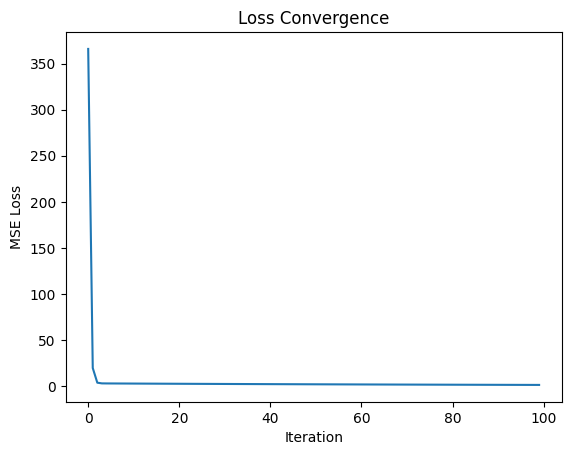

In [11]:
# Btvn 2
# Tạo 1 số tập dữ liệu giả lập với x là số giờ học từ 1 -10 và y là số điểm được tính theo công thức
# y = 3*x + 5 + noise với noise là 1 giá trị ngẫu nhiên nhỏ
# 1. Khởi tạo tham số w và b ngẫu nhiên với require_grad = true
# 2. tính mse
# 3. tính gradient
# 4. cập nhật w và b bằng radianr descent với learing rate alpha = 0.01
# 5. lập lại giá trị trên trong 100 vòng lặp và quan sát sự hội tụ của mô hình
import torch
import numpy as np

# 1. Tạo tập dữ liệu giả lập
torch.manual_seed(42)  # Để kết quả có thể tái hiện
x = torch.linspace(1, 10, 10)  # x từ 1 đến 10
noise = torch.randn(10) * 0.1  # Noise ngẫu nhiên nhỏ
y = 3 * x + 5 + noise  # y = 3x + 5 + noise

# 2. Khởi tạo tham số w và b ngẫu nhiên
w = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

# 3. Định nghĩa hàm dự đoán và MSE loss
def predict(x):
    return w * x + b

def mse_loss(y_pred, y_true):
    return ((y_pred - y_true) ** 2).mean()

# 4. Gradient Descent
learning_rate = 0.01
num_iterations = 100

# Lưu giá trị loss để quan sát
losses = []

print("Giá trị ban đầu:")
print(f"w = {w.item():.4f}, b = {b.item():.4f}\n")

# 5. Training loop
for i in range(num_iterations):
    # Forward pass
    y_pred = predict(x)
    loss = mse_loss(y_pred, y)

    # Backward pass
    loss.backward()

    # Cập nhật tham số
    with torch.no_grad():
        w -= learning_rate * w.grad
        b -= learning_rate * b.grad

        # Reset gradient
        w.grad.zero_()
        b.grad.zero_()

    # Lưu loss
    losses.append(loss.item())

    # In kết quả mỗi 10 vòng lặp
    if (i + 1) % 10 == 0:
        print(f"Vòng lặp {i+1}:")
        print(f"Loss = {loss.item():.4f}")
        print(f"w = {w.item():.4f}, b = {b.item():.4f}\n")

# In kết quả cuối cùng
print("Kết quả cuối cùng:")
print(f"w = {w.item():.4f} (thực tế: 3)")
print(f"b = {b.item():.4f} (thực tế: 5)")

# Vẽ đồ thị loss (tuỳ chọn)
import matplotlib.pyplot as plt
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('MSE Loss')
plt.title('Loss Convergence')
plt.show()


In [ ]:
# pytorch with tensor
import torch
import numpy as np

torch.__version__

#  chuyển đổi mảng numpy sang tensor pytorch
arr = np.array([1,2,3,4,5])
print(arr)
print(arr.dtype)
print(type(arr))

x = torch.from_numpy(arr)
print(x)
print(x.dtype)
print(type(x))

[1 2 3 4 5]
int64
<class 'numpy.ndarray'>
tensor([1, 2, 3, 4, 5])
torch.int64
<class 'torch.Tensor'>


In [ ]:
arr2 = np.arange(0.,12.).reshape(4,3)
print(arr2)
print(arr2.dtype)
print(type(arr2))

x2 = torch.from_numpy(arr2)
print(x2)
print(type(x2))

[[ 0.  1.  2.]
 [ 3.  4.  5.]
 [ 6.  7.  8.]
 [ 9. 10. 11.]]
float64
<class 'numpy.ndarray'>
tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.]], dtype=torch.float64)
<class 'torch.Tensor'>


In [7]:
arr = np.arange(0,5)
x = torch.from_numpy(arr)
print(x)
arr[0] = 99
print(x)

tensor([0, 1, 2, 3, 4])
tensor([99,  1,  2,  3,  4])


In [9]:

arr = np.arange(0,5)
x = torch.tensor(arr)
arr[0] = 99
print(x)
print(x)
# Giải thích lý do tại sao có 2 trường hợp sau
# Giải thích: ở cách 1, sử dụng from_numpy giúp có thể thay đổi giá trị thứ [i] trong arr, còn cách 2 dùng tensor không thay đổi được theo index [i]

tensor([0, 1, 2, 3, 4])
tensor([0, 1, 2, 3, 4])


In [12]:
# Tạo tensor với:
# empyty
# zeros
# ones
# random
# reshape với view và view as

import torch

# 1. Tạo tensor empty (rỗng - chứa giá trị ngẫu nhiên chưa khởi tạo)
empty_tensor = torch.empty(2, 3)  # tensor 2x3
print("Empty tensor:")
print(empty_tensor)
print()

# 2. Tạo tensor zeros (toàn số 0)
zeros_tensor = torch.zeros(2, 3)  # tensor 2x3
print("Zeros tensor:")
print(zeros_tensor)
print()

# 3. Tạo tensor ones (toàn số 1)
ones_tensor = torch.ones(2, 3)  # tensor 2x3
print("Ones tensor:")
print(ones_tensor)
print()

# 4. Tạo tensor random (giá trị ngẫu nhiên)
random_tensor = torch.rand(2, 3)  # tensor 2x3, giá trị ngẫu nhiên từ 0-1
print("Random tensor:")
print(random_tensor)
print()

# 5. Reshape với view và view_as
# Tạo tensor mẫu
original_tensor = torch.arange(12)  # tensor [0, 1, 2, ..., 11]
print("Original tensor:")
print(original_tensor)
print()

# Sử dụng view() để reshape thành 3x4
viewed_tensor = original_tensor.view(3, 4)
print("After view(3, 4):")
print(viewed_tensor)
print()

# Sử dụng view() để reshape thành 2x6
viewed_tensor2 = original_tensor.view(2, 6)
print("After view(2, 6):")
print(viewed_tensor2)
print()

# Sử dụng view_as() để reshape giống một tensor khác
target_tensor = torch.zeros(4, 3)  # tensor mẫu để lấy shape
viewed_as_tensor = original_tensor.view_as(target_tensor)
print("After view_as(target_tensor) - shape giống 4x3:")
print(viewed_as_tensor)

Empty tensor:
tensor([[6.3550e-20, 4.4938e-41, 2.6844e-33],
        [0.0000e+00, 0.0000e+00, 6.3227e-42]])

Zeros tensor:
tensor([[0., 0., 0.],
        [0., 0., 0.]])

Ones tensor:
tensor([[1., 1., 1.],
        [1., 1., 1.]])

Random tensor:
tensor([[0.1053, 0.2695, 0.3588],
        [0.1994, 0.5472, 0.0062]])

Original tensor:
tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

After view(3, 4):
tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

After view(2, 6):
tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11]])

After view_as(target_tensor) - shape giống 4x3:
tensor([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]])
